# 機器學習

In [1]:
import numpy as np 
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn
%precision 3

import requests, zipfile
import io

### 多元線性迴歸

In [2]:
#取得資訊
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

In [3]:
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

In [4]:
auto.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
auto.columns =['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
              'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
              'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
              'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [6]:
print('汽車資料的形式:{}'.format(auto.shape))

汽車資料的形式:(205, 26)


In [7]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
auto = auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [9]:
auto = auto.replace('?', np.nan).dropna()
print('汽車資料的形式:{}'.format(auto.shape))

汽車資料的形式:(199, 4)


In [10]:
print('資料型別確認(型別轉換前)\n{}\n'.format(auto.dtypes))

資料型別確認(型別轉換前)
price          object
horsepower     object
width         float64
height        float64
dtype: object



In [11]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print('資料型別確認(型別轉換後)\n{}\n'.format(auto.dtypes))

資料型別確認(型別轉換後)
price           int64
horsepower      int64
width         float64
height        float64
dtype: object



In [12]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [13]:
# 為了資料分割匯入
from sklearn.model_selection import train_test_split

# 多元線性回歸建構
from sklearn.linear_model import LinearRegression

# 指定目標變數為price,其他為解釋變數
X= auto.drop('price',axis=1)
y = auto['price']

# 分為訓練資料跟測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 多元線性回歸初始化與學習
model = LinearRegression()
model.fit(X_train, y_train)

# 顯示決定係數
print('決定係數(train):(:.3f)'.format(model.score(X_train, y_train)))
print('決定係數(test):(:.3f)'.format(model.score(X_test, y_test)))

#顯示迴歸係數與截距
print('\n迴歸係數\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('截距:{:.3f}',format(model.intercept_))

決定係數(train):(:.3f)
決定係數(test):(:.3f)

迴歸係數
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
截距:{:.3f} -128409.0463033857


### 邏輯迴歸

In [14]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

adult = pd.read_csv(io.StringIO(res.decode('utf-8')),header = None)

adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation','relationship','race','sex','capital-gain',
                'capital-loss','hour-per-week','native-country','flg-50K']

#輸出資料形式與遺漏數量
print('資料形式:{}'.format(adult.shape))
print('遺漏的數量:{}'.format(adult.isnull().sum().sum()))

adult.head()

資料形式:(32561, 15)
遺漏的數量:0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [16]:
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x ==' >50K' else 0)
adult.groupby('fin_flg').size()

fin_flg
0    24720
1     7841
dtype: int64

In [17]:
adult.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hour-per-week,fin_flg
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hour-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
fin_flg,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


# 模型建立與評估

In [18]:
from sklearn.linear_model import LogisticRegression   #此行不同
from sklearn.model_selection import train_test_split

#解釋變數、目標變數設定
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 分為訓練資料、測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#邏輯迴歸類別的初始化與學習
model = LogisticRegression()
model.fit(X_train, y_train)

#顯示準確度
print('準確度(train):{:.3f}'.format(model.score(X_train, y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test, y_test)))

準確度(train):0.797
準確度(test):0.798


In [19]:
model.coef_

array([[-1.185e-02, -4.379e-06, -2.774e-03,  3.274e-04,  7.532e-04]])

In [20]:
np.exp(model.coef_)

array([[0.988, 1.   , 0.997, 1.   , 1.001]])

#### 藉由縮放提高模型準確度

In [21]:
# 標準化類別
from sklearn.preprocessing import StandardScaler  #此行不同
from sklearn.model_selection import train_test_split

# 設定X,y
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 分為訓練資料、測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化處理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#邏輯迴歸類別的初始化與學習
model = LogisticRegression()
model.fit(X_train_std, y_train)

#顯示準確度
print('準確度(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test_std, y_test)))

準確度(train):0.811
準確度(test):0.810


# 具正則化回歸 Lasso、Ridge regression

In [22]:
auto.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


### 使用sklearn.linear_model 模組的 Ridge類別 建構回歸模型

In [23]:
#用於 Ridge 迴歸類別
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = auto.drop('price', axis = 1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)

#模型建構與評估
linear = LinearRegression()
ridge = Ridge(random_state=0)

for model in [linear, ridge]:
    model.fit(X_train, y_train)
    print('{}(train):{:.6f}'.format(model.__class__.__name__, model.score(X_train, y_train)))
    print('{}(test):{:.6f}'.format(model.__class__.__name__, model.score(X_test, y_test)))


LinearRegression(train):0.733358
LinearRegression(test):0.737069
Ridge(train):0.733355
Ridge(test):0.737768


---

# Decision tree決策樹

In [24]:
# 蕈類資料搜集
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 將取得的資料作為dataframe物件讀取
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8-sig')),header = None)

#在資料中設定標籤
mushroom.columns = ['classes','cap_shape','cap_surface','cap_color','odor','bruises',
                   'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                   'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                   'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                   'ring_number','ring_type','spore_print_color','population','habitat']

mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [25]:
print('資料形式:{}'.format(mushroom.shape))
print('遺漏數量:{}'.format(mushroom.isnull().sum().sum()))

資料形式:(8124, 23)
遺漏數量:0


In [26]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
#將目標變數旗標化(0/1化)
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x:1 if x == 'p' else 0)

In [28]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [29]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [30]:
- (0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.0

#### 由上述可知 熵=1.0 

事實上資料雜亂度最大時，熵會是1.0

In [31]:
-(0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

0.011407757737461138

#### 由上述可知熵 接近0 
在這個狀態下幾乎可以鎖定毒菇，因此熵會很小。
總結：熵接近1.0無法識別狀態，接近0可以表示適當識別狀態

p1 = 1 - p2

In [32]:
def calc_entropy(p):
    return - (p *np.log2(p) + (1-p) * np.log2(1-p))

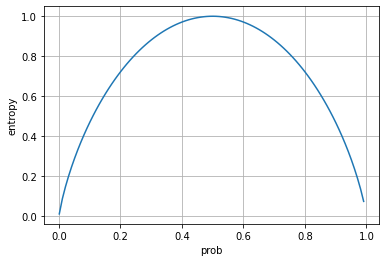

In [33]:
# p 從 0.001到0.999之間以0.01刻度移動
p = np.arange(0.001, 0.999, 0.01)
# Graphical
plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [34]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

In [35]:
entropy_init = - (0.518 * np.log2(0.518) + 0.482 * np.log2(0.482))
print('毒菇資料的熵初始值:{:.3}'.format(entropy_init))

毒菇資料的熵初始值:0.999


#### 沒有毒的蕈類(0)有4208個，毒菇(1)有3916個。 非毒菇的比例為0.518(=4208/8124) ，毒菇的比例0.482(=3916/8124)，熵的初始值=0.999

# 資訊獲利(information gain): 測量分歧條件的可用性

In [36]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [37]:
# cap_color 不為 c 時的熵
p1 = 4176 / (4176 +3904)
p2 = 1 - p1
entropy_c0 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c0:{:.3f}'.format(entropy_c0))

entropy_c0:0.999


In [38]:
# cap_color 為 c 時的熵
p1 = 32 / (32+12)
p2 = 1 - p1
entropy_c1 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c1:{:.3f}'.format(entropy_c1))

entropy_c1:0.845


In [39]:
entropy_after = (4176+3904)/8124*entropy_c0 + (32+12)/8124*entropy_c1
print('資料平均分割的平均熵:{:.3f}'.format(entropy_after))

資料平均分割的平均熵:0.998


In [40]:
print('以變數cap_color進行分割所得的資訊獲利:{:.3f}'.format(entropy_init - entropy_after))

以變數cap_color進行分割所得的資訊獲利:0.001


# 決策樹模型建構(Decision Tree)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#資料分割
X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#決策樹類別的初始化與學習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)


print('準確度(train):{:.3f}'.format(model.score(X_train,y_train)))
print('準確度(test):{:.3f}'.format(model.score(X_test,y_test)))

準確度(train):0.883
準確度(test):0.894


# DecisionTree
##### from sklearn.externals.six import StringIO (新版本不適用)
##### from six import StringIO (新版本引入模組方法)
下載方法
##### brew install graphviz 
##### pip install -U pydotplus

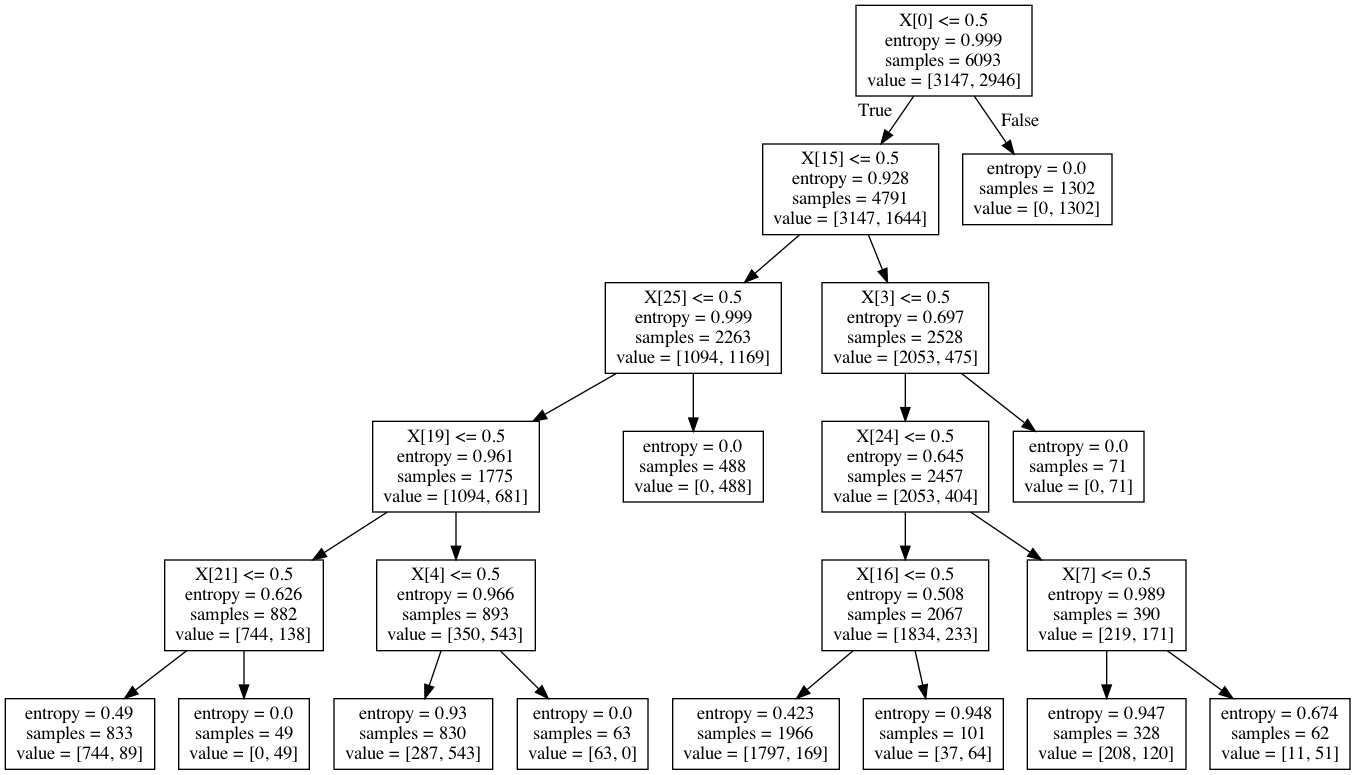

In [42]:
from sklearn import tree
import pydotplus
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

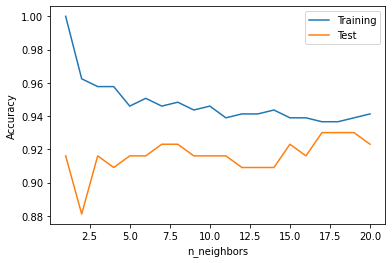

In [43]:
from sklearn.datasets import load_breast_cancer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#讀取資料集
cancer = load_breast_cancer()

#分為訓練資料與測試資料
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state =0)

#準備圖描繪用的list
training_accuracy = []
test_accuracy = []

#learn 
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

#描繪圖形
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

# 蕈類資料knn建模

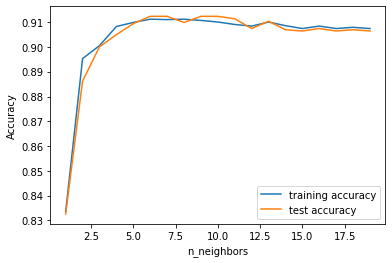

In [79]:
# 蕈類資料搜集
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 將取得的資料作為dataframe物件讀取
mush = pd.read_csv(io.StringIO(res.decode('utf-8-sig')),header = None)

#在資料中設定標籤
mush.columns = ['classes','cap_shape','cap_surface','cap_color','odor','bruises',
                   'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                   'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                   'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                   'ring_number','ring_type','spore_print_color','population','habitat']

mush_dummy = pd.get_dummies(mush[['gill_color','gill_attachment','odor','cap_color']])
mush_dummy['flg'] = mush['classes'].map(lambda x: 1 if x == 'p' else 0)


from sklearn.neighbors import KNeighborsClassifier

#解釋變數與目標變數
X = mush_dummy.drop('flg', axis=1)
y = mush_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy,  label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()